# Cells width

In [40]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Imports

In [2]:
from xlstm_moex.pipeline import ExperimentPipeline

# Constants

In [3]:
CONFIG_FILENAME = 'experiment_configs/xlstm_experiment_step_preds.yaml'
# CONFIG_FILENAME = 'experiment_configs/lstm_experiment.yaml'
DATASET_FILENAME = 'data/train/yndx_20150901_20200901.csv'

# Init pipeline

In [55]:
experiment_pipeline = ExperimentPipeline(pipeline_cfg_filename=CONFIG_FILENAME)

In [56]:
experiment_pipeline.run()

2024-11-01 21:37:07,820 - xlstm_moex.pipeline - INFO - Start `data_preproces` stage
2024-11-01 21:37:07,821 - xlstm_moex.data.process - INFO - Start applying `nn` processing to input data, data_filename=data/train/yndx_20150901_20200901.csv, sequence_length=75, scaler_type=min_max
2024-11-01 21:37:07,827 - xlstm_moex.data.process - INFO - Number of examples is 1186
2024-11-01 21:37:07,827 - xlstm_moex.pipeline - INFO - Start `train_val_test_split` stage
2024-11-01 21:37:07,828 - xlstm_moex.data.split - INFO - Shape of train is (884, 75)
2024-11-01 21:37:07,829 - xlstm_moex.data.split - INFO - Shape of val is (222, 75)
2024-11-01 21:37:07,829 - xlstm_moex.data.split - INFO - Shape of test is (80, 75)
2024-11-01 21:37:07,829 - xlstm_moex.pipeline - INFO - Start `init_model` stage
2024-11-01 21:37:07,854 - xlstm_moex.pipeline - INFO - Start `train` stage


<class 'numpy.ndarray'>
[-0.95080847 -0.96082897 -0.95718515 ...  0.9044409   0.91373263
  1.        ]
[0.99107265 0.96064678 0.9044409  0.91373263 1.        ]
[0.99107265 0.96064678 0.9044409  0.91373263 1.        ]
Epoch [1/100], Train Loss: 0.3081, Validation Loss: 0.0016
Epoch [2/100], Train Loss: 0.0315, Validation Loss: 0.0070
Epoch [3/100], Train Loss: 0.0090, Validation Loss: 0.0046
Epoch [4/100], Train Loss: 0.0045, Validation Loss: 0.0017
Epoch [5/100], Train Loss: 0.0032, Validation Loss: 0.0009
Epoch [6/100], Train Loss: 0.0027, Validation Loss: 0.0007
Epoch [7/100], Train Loss: 0.0026, Validation Loss: 0.0008
Epoch [8/100], Train Loss: 0.0025, Validation Loss: 0.0007
Epoch [9/100], Train Loss: 0.0024, Validation Loss: 0.0008
Epoch [10/100], Train Loss: 0.0024, Validation Loss: 0.0007
Epoch [11/100], Train Loss: 0.0023, Validation Loss: 0.0008
Epoch [12/100], Train Loss: 0.0022, Validation Loss: 0.0008
Epoch [13/100], Train Loss: 0.0022, Validation Loss: 0.0009
Epoch [14/10

2024-11-01 21:37:56,419 - xlstm_moex.pipeline - INFO - Start `test` stage


Epoch [100/100], Train Loss: 0.0005, Validation Loss: 0.0005


In [57]:
experiment_pipeline.train_val_test_data['train']['X'].shape

(884, 75)

In [58]:
experiment_pipeline.train_val_test_data['train']['y'].shape

(884, 75)

In [59]:
experiment_pipeline.predictions['all']

{'loss': 0.04049013032159039,
 'true': array([-7.05989524e-03,  4.31336825e-02,  3.81234343e-02,  3.39330449e-02,
        -4.32703257e-03, -1.26167160e-02,  4.09929401e-04,  4.13117741e-02,
         3.29309952e-02,  2.61899340e-02,  1.41197905e-03,  1.35276702e-02,
         3.81234343e-02,  9.70166249e-03, -3.50717376e-03, -8.88180369e-03,
        -1.58961512e-02, -1.79913459e-02, -2.15440674e-02, -1.29810977e-02,
        -6.14894102e-03,  5.51127306e-03,  5.69346390e-03,  5.32908221e-03,
        -5.23798679e-03, -2.20906399e-02,  4.54110681e-02,  6.39034389e-02,
         7.92985652e-02,  1.01799135e-01,  1.30129811e-01,  1.62104304e-01,
         2.49464814e-01,  2.69505807e-01,  2.49009337e-01,  2.65588704e-01,
         2.91277613e-01,  3.07856980e-01,  3.13504896e-01,  3.45479390e-01,
         3.23798679e-01,  3.21339103e-01,  3.39375996e-01,  3.42746527e-01,
         3.57868367e-01,  3.99681166e-01,  4.37394671e-01,  4.27920747e-01,
         4.88499203e-01,  5.14916875e-01,  4.92143

In [60]:
import pandas as pd
import numpy as np
def plot_preds(preds, num_steps):
    seq_len = preds[num_steps]['true'].shape[0]
    df_pred_vs_target = pd.DataFrame(
        {
            'target': preds[num_steps]['true'].reshape(seq_len, ),
            'pred': preds[num_steps]['predicted'].reshape(seq_len, )
        }
    )
    df_pred_vs_target['step'] = np.arange(1, seq_len + 1)
    df_pred_vs_target.plot(x='step', y=['pred', 'target'], figsize=(18, 9))

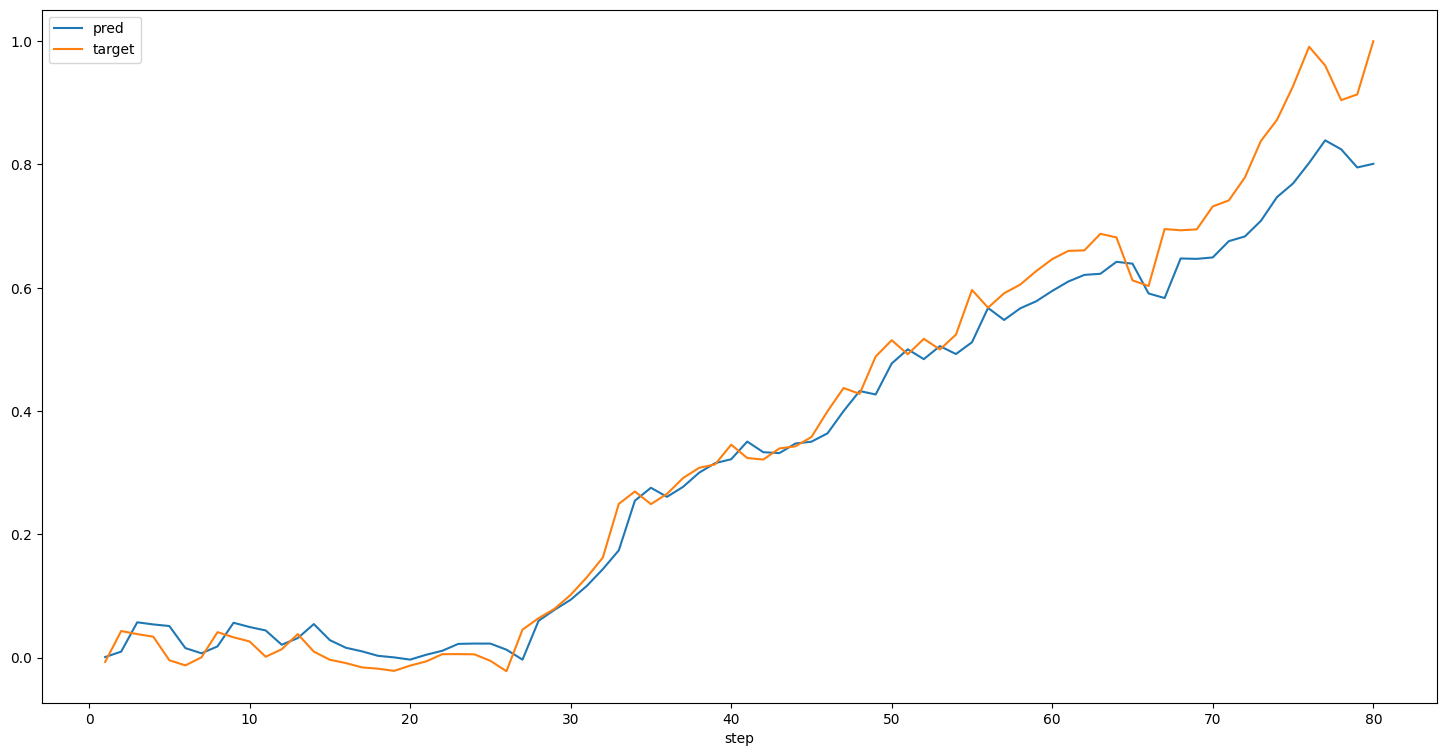

In [61]:
plot_preds(experiment_pipeline.predictions, 'all')

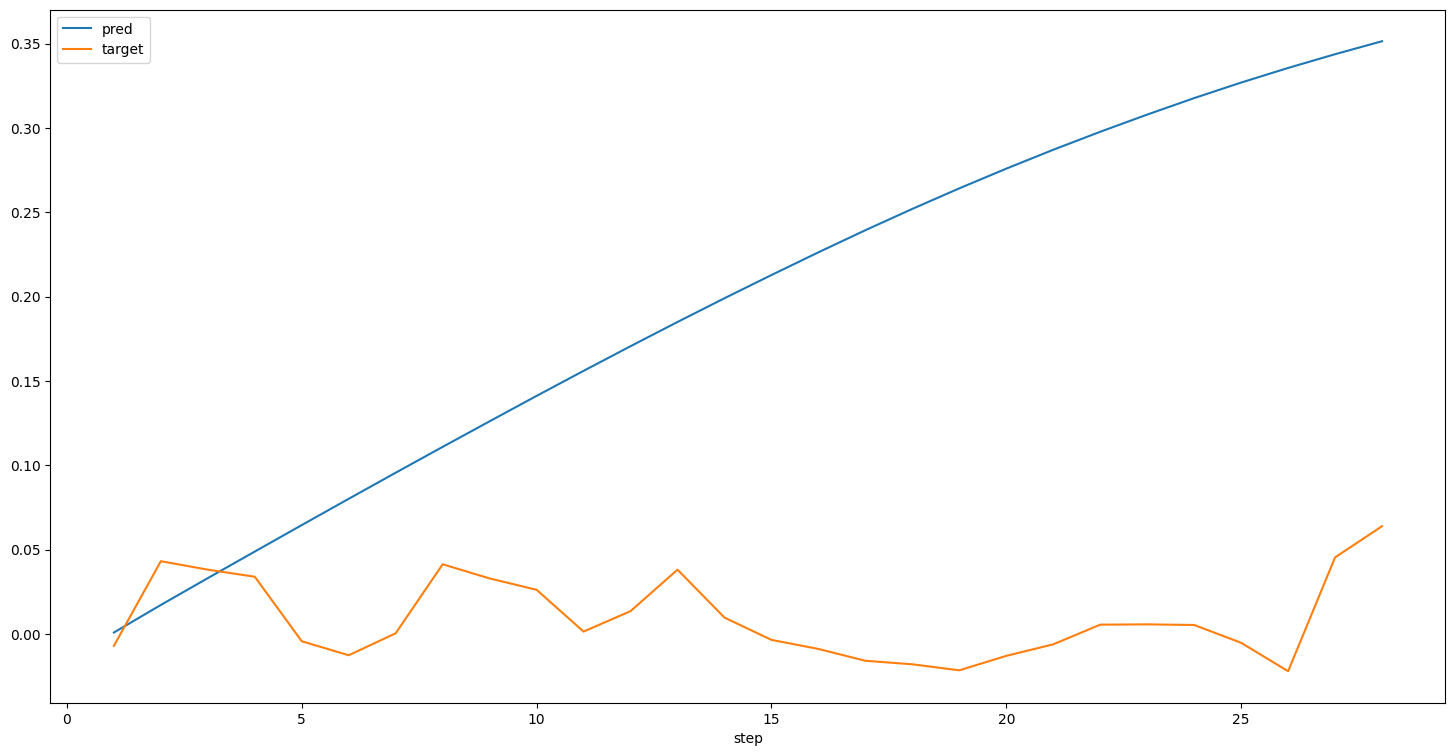

In [62]:
plot_preds(experiment_pipeline.predictions, 28)

In [63]:
from sklearn.metrics import r2_score

In [64]:
# xlstm
# lstm
r2_score(
    experiment_pipeline.predictions[7]['true'],
    experiment_pipeline.predictions[7]['predicted']
)

-5.694630538904402

In [65]:
np.corrcoef(
    experiment_pipeline.predictions[14]['true'].reshape(-1,),
    experiment_pipeline.predictions[14]['predicted'].reshape(-1,)
)

array([[1.      , 0.020233],
       [0.020233, 1.      ]])

In [66]:
experiment_pipeline.predictions[14]

{'loss': 0.08830860539134923,
 'true': array([-0.0070599 ,  0.04313368,  0.03812343,  0.03393304, -0.00432703,
        -0.01261672,  0.00040993,  0.04131177,  0.032931  ,  0.02618993,
         0.00141198,  0.01352767,  0.03812343,  0.00970166]),
 'predicted': array([0.00086438, 0.01719656, 0.03311599, 0.04886296, 0.06455138,
        0.08013767, 0.09561883, 0.11093194, 0.12609723, 0.14116713,
        0.1560075 , 0.17062172, 0.18498456, 0.19906738], dtype=float32)}

In [67]:
import json
import copy

xlstm_preds = copy.deepcopy(experiment_pipeline.predictions)
for key, val in xlstm_preds.items():
    xlstm_preds[key] = val
    if not isinstance(xlstm_preds[key]['loss'], float):
        xlstm_preds[key]['loss'] = xlstm_preds[key]['loss'].item()
    xlstm_preds[key]['true'] = xlstm_preds[key]['true'].reshape(-1,).tolist()
    xlstm_preds[key]['predicted'] = xlstm_preds[key]['predicted'].reshape(-1,).tolist()

with open("data/test/xlstm_forecast_3_step_preds.json", "w") as fp:
    json.dump(xlstm_preds, fp) 

In [143]:
l = np.array([1,2])

In [147]:
l[2:2]

array([], dtype=int64)